In [11]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#1) Probability if exactly 3 people getting the disease
x=3
n=50
p=1/10
stats.binom.pmf(x,n,p)

0.13856514960695693

In [3]:
#2)Probability if atleast 3 people getting the disease
x=3
n=50
p=1/10
1-stats.binom.cdf(x,n,p)

0.7497060940466924

In [4]:
#2)Probability if atmost 3 people getting the disease
x=3
n=50
p=1/10
stats.binom.cdf(x,n,p)

0.2502939059533075

In [5]:
#2)Probability between 3 and 10 people getting the disease

stats.binom.cdf(10,50,0.1)-stats.binom.cdf(3,50,0.1)

0.7403514924593635

In [9]:
#) range will step in whole steps vs arage will step in fraction also for more resesolution
x=np.arange(0,31)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

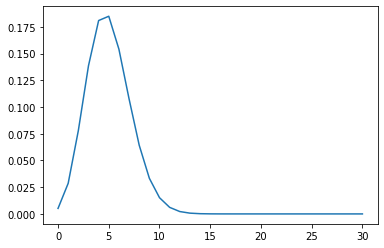

In [12]:
prob=stats.binom.pmf(x,50,0.1)
plt.plot(prob)

In [14]:
#in a village avarage no of people affected by corona virus in a day is 5 find the probability of fallowing 
#exactly 2 person suffering with corona
#atleast 2 people to suffer 
#atmost 2 person suffer
#between 2 and 5 people to suffer

x=2
n=5
stats.poisson.pmf(x,n)




0.08422433748856832

In [15]:
#atleast 2 people to suffer 

1-stats.poisson.cdf(x,n)

0.8753479805169189

In [16]:
#atmost 2 people to suffer 

stats.poisson.cdf(x,n)

0.12465201948308108

In [17]:
stats.poisson.cdf(5,5)-stats.poisson.cdf(2,5)

0.49130863534998187

In [19]:
x=np.arange(0,30)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

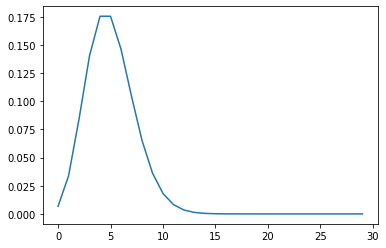

In [20]:
prob=stats.poisson.pmf(x,5)
plt.plot(prob)

The systolic pressure of a randomly selected people group is normally
distibuted with the mean value of 118 and standard deviation of 15

what is the probability that the pressure for a randomly selected person:
    
    1.between 120 and 139 psi
    2.less than 120 psi
    3.greater than 140
    
    


In [26]:
#a
mu=118
sig=15
z120=(120-mu)/sig
z139=(139-mu)/sig
z140=(140-mu)/sig
stats.norm.cdf(z139)-stats.norm.cdf(z120)

0.3662082241426149

In [27]:
#2
stats.norm.cdf(z120)

0.553035116623614

In [29]:
#3
1-stats.norm.cdf(z139)

0.08075665923377107

In [30]:
#sampling approach
w=np.random.randn(85000)

In [31]:
w.max(),w.min()

(4.377658930679472, -4.403523314578674)

In [37]:
w_pop = w*0.8+3
w_pop

array([3.03753883, 2.70742039, 3.01142687, ..., 4.19170341, 2.73567985,
       4.23329646])

In [39]:
import pandas as pd
pd.DataFrame(w_pop).describe()

,0
count,85000.000000
mean,2.996182
std,0.799665
min,-0.522819
25%,2.458785
50%,2.996204
75%,3.536226
max,6.502127


In [46]:
#Sampling - classical approach
trail=[]
for j in np.arange(200): #mean of 200 sample set
    samp=[]
    for i in np.arange(500): # sample size
        samp.append(np.random.choice(w_pop))
    trail.append(np.mean(samp))

In [47]:
len(trail)

200

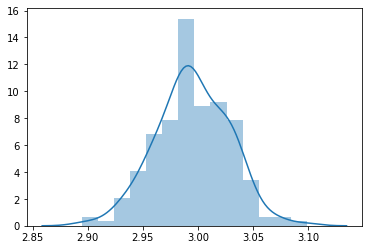

In [48]:
import seaborn as sb
sb.distplot(trail)

In [51]:
me=np.mean(trail)

In [52]:
sd=np.std(trail)

In [53]:
#with respect to 3 sigma,what is the range for mean

me-3*sd,me+3*sd

(2.8958842826829327, 3.094599573718435)

In [54]:
#with respect to 2 sigma,what is the range for mean ie 95.5 % data

me-2*sd,me+2*sd

(2.9290034978555166, 3.061480358545851)

In [55]:
#with respect to 2 sigma,what is the range for mean ie 95approx % data

me-1.96*sd,me+1.96*sd

(2.93032826646242, 3.060155589938948)

In [56]:
#practical approach
type(np.mean(samp))



numpy.float64

In [62]:
#from 85000 data we are taking only one sample set

me2 = np.mean(samp)
sd2 = np.std(samp,ddof=1)

me2,sd2

(3.0368895928240582, 0.8134005718258407)

In [68]:
sd_corr=sd2/np.sqrt(len(samp))
sd_corr

0.0363763794307956

In [69]:
pd.DataFrame(samp).describe()

,0
count,500.000000
mean,3.036890
std,0.813401
min,0.537668
25%,2.497075
50%,3.046475
75%,3.528696
max,6.273689


In [70]:
#compute the 95 percent confidence interval for 

me2-1.96*sd2,me2+1.96*sd2

(1.4426244720454104, 4.631154713602706)

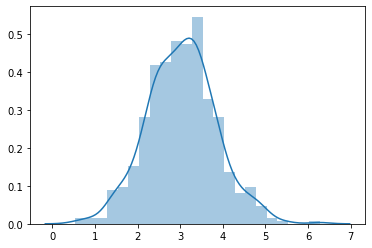

In [71]:
sb.distplot(samp)

In [72]:
me2-1.96*sd_corr,me2+1.96*sd_corr

(2.965591889139699, 3.1081872965084174)

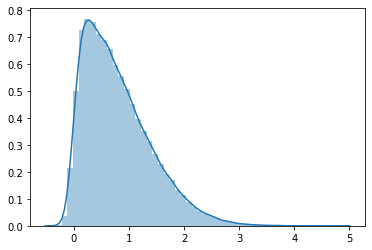

In [76]:
pop = stats.skewnorm.rvs(a=10,size=100000) #1laks values 
sb.distplot(pop)